# <<-----------------------House Price Prediction--------------------->>

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(100)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train.csv")

In [3]:
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)

In [4]:
## Let's check the head of the Data
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [5]:
##Let's check the shape of the data
df.shape

(29451, 12)

In [6]:
## Let's check if any null values exist in our dataset or not
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [7]:
##The datasets seems clean
#Let's see the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


## Let's Perform EDA

In [8]:
##Let's see how many categorical columns are there in our dataset
cat_cols=[col for col in df.columns if df[col].dtypes=="O"]

In [9]:
cat_cols

['POSTED_BY', 'BHK_OR_RK', 'ADDRESS']

In [10]:
df[cat_cols]

,POSTED_BY,BHK_OR_RK,ADDRESS
0,Owner,BHK,"Ksfc Layout,Bangalore"
1,Dealer,BHK,"Vishweshwara Nagar,Mysore"
2,Owner,BHK,"Jigani,Bangalore"
3,Owner,BHK,"Sector-1 Vaishali,Ghaziabad"
4,Dealer,BHK,"New Town,Kolkata"
...,...,...,...
29446,Owner,BHK,"Shamshabad Road,Agra"
29447,Owner,BHK,"E3-108, Lake View Recidency,,Vapi"
29448,Dealer,BHK,"Ajmer Road,Jaipur"
29449,Owner,BHK,"Sholinganallur,Chennai"


In [11]:
##Let's see posted owner

In [12]:
df["POSTED_BY"].value_counts()

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

In [13]:
sns.countplot(df["POSTED_BY"])

ValueError: could not convert string to float: 'Owner'

In [14]:
## Let's See How Price of the House Varies According the Posted member
df.groupby("POSTED_BY")["TARGET(PRICE_IN_LACS)"].mean()

POSTED_BY
Builder    245.705627
Dealer     186.774735
Owner       60.674264
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [15]:
## As you can see ,if Builder Posts the project it will be higher price.

In [16]:
## let's see how many buildings are in construction
df["UNDER_CONSTRUCTION"].value_counts()

0    24157
1     5294
Name: UNDER_CONSTRUCTION, dtype: int64

<Axes: ylabel='count'>

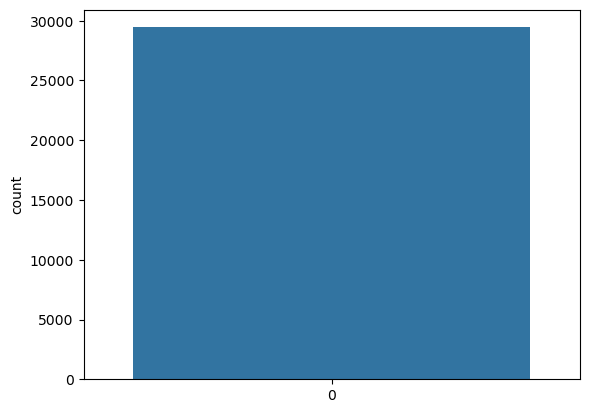

In [17]:
sns.countplot(df["UNDER_CONSTRUCTION"])

In [18]:
## Let's Visulaize the Rera columns
##RERA- Rear state regularity Act
## It was formed to bring transperency in Real Estate Sector
df["RERA"].value_counts()

0    20088
1     9363
Name: RERA, dtype: int64

<Axes: ylabel='count'>

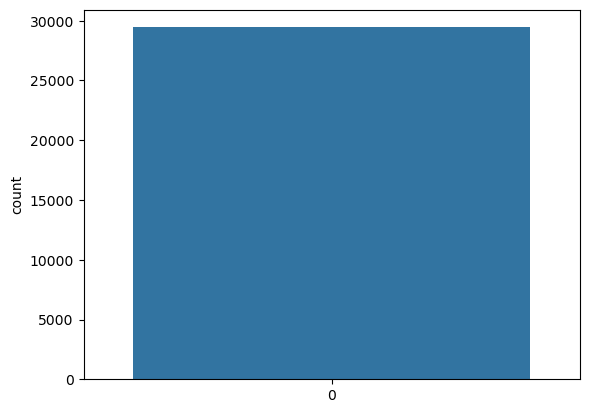

In [19]:
sns.countplot(df["RERA"])

<Axes: xlabel='RERA'>

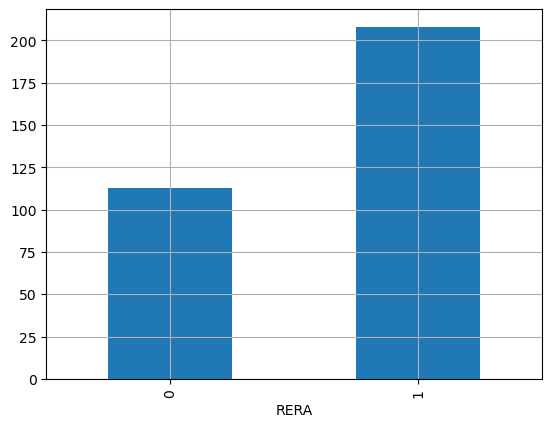

In [20]:
df.groupby("RERA")["TARGET(PRICE_IN_LACS)"].mean().plot(kind="bar",grid=True)

In [21]:
## It is ovibous that RERA approved buliding are of Higher Price
##Because it aims to reduce project delays and mis-selling.

In [22]:
## Let's See on BHK_NO which represents number of rooms
df["BHK_NO."].value_counts()

2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
20        4
10        4
15        4
12        3
9         3
13        1
17        1
11        1
Name: BHK_NO., dtype: int64

In [23]:
##As we can see we number of rooms ranging from 1 to 17
#But generally we don't have more than 6 columns as you can see from the distribution
## The values that are greater than 6 can be treated as potential outliers
## Let's Remove this Values From Our dataset
df2=df[df["BHK_NO."]<7]

In [24]:
df2.shape

(29409, 12)

In [25]:
len(df2)/len(df)*100

99.85739024141796

In [26]:
df2["BHK_NO."].value_counts()

2    13324
3    10546
1     3574
4     1723
5      190
6       52
Name: BHK_NO., dtype: int64

In [27]:
df2.groupby(["BHK_NO."])["TARGET(PRICE_IN_LACS)"].mean()

BHK_NO.
1     72.563433
2     97.176584
3    176.329423
4    350.820255
5    604.187895
6    868.842308
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [28]:
## As you can see as the number of rooms increases , price of the house decrease

In [29]:
## Let's See how many are RK and How Many are BHK
df2["BHK_OR_RK"].value_counts()

BHK    29385
RK        24
Name: BHK_OR_RK, dtype: int64

In [30]:
## RK means Rooms and Kitchen which mean in a single big room there is kitchen and room attached 
## These type of housese are rare and used in old days

In [31]:
df2[df2["BHK_OR_RK"]=="RK"]["BHK_NO."].value_counts()

1    24
Name: BHK_NO., dtype: int64

In [32]:
## As you can see these are only single rooms
## Hence it would be better to remove these values.
## As after removing this value we have only BHK value left in that column , It would be better to remove this columns

In [33]:
df3=df2[df2["BHK_OR_RK"]!="RK"]

In [34]:
df3.drop(columns=["BHK_OR_RK"],inplace=True)

In [35]:
df3.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [36]:
## Let's See SQUARE_FT columns
df["SQUARE_FT"]

0        1300.236407
1        1275.000000
2         933.159722
3         929.921143
4         999.009247
            ...     
29446    2500.000000
29447     769.230769
29448    1022.641509
29449     927.079009
29450     896.774194
Name: SQUARE_FT, Length: 29451, dtype: float64

KeyboardInterrupt: 

<Figure size 1000x500 with 0 Axes>

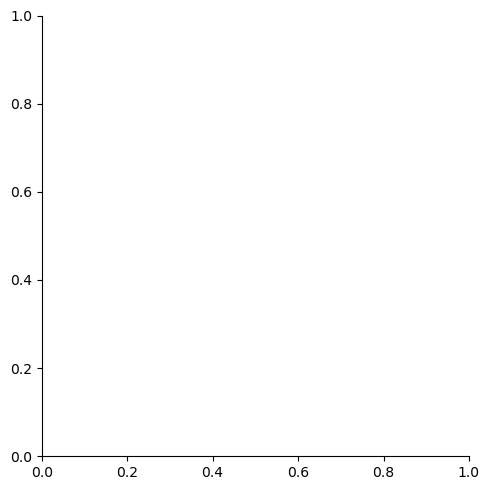

In [37]:
plt.figure(figsize=(10,5))
sns.displot(df3["SQUARE_FT"])

In [ ]:
## Let's See the scatter plot between squaers
plt.figure(figsize=(20,16))
plt.scatter(x=df3["SQUARE_FT"],y=df3["TARGET(PRICE_IN_LACS)"])

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(df3["SQUARE_FT"])

In [43]:
df3[df3["SQUARE_FT"]>3*1e5]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
373,Owner,0,0,4,4.333333e+05,1,1,"Mulanthuruthy,Kochi",9.893479,76.408774,65.0
10745,Owner,0,0,3,2.545455e+08,1,1,"Malur,Bangalore",13.021000,77.938000,28000.0
11238,Dealer,0,0,3,1.875000e+08,1,1,"R.T. Nagar,Bangalore",13.018900,77.596300,30000.0
15598,Owner,0,0,3,7.928571e+05,1,1,"Sainik Colony,Jammu",32.674044,74.907348,55.5
15724,Owner,0,0,2,8.064516e+07,1,1,"Lakkasandra,Bangalore",12.795926,77.331535,25000.0
22155,Owner,0,0,1,3.400000e+05,1,1,"Sayajipura,Vadodara",22.323406,73.240395,17.0
25241,Owner,0,0,3,4.300000e+06,1,1,"New Kumaran Nagar,Chennai",10.810426,78.668914,43.0
28591,Owner,0,0,2,8.750000e+05,1,1,"Ajit Singh Nagar,Vijayawada",30.466084,74.501902,35.0


In [44]:
## These Eight values are potential Outliers.As square foot size is extremely high
##hence drop these values
df4=df3[df3["SQUARE_FT"]<3*1e5]

<Axes: >

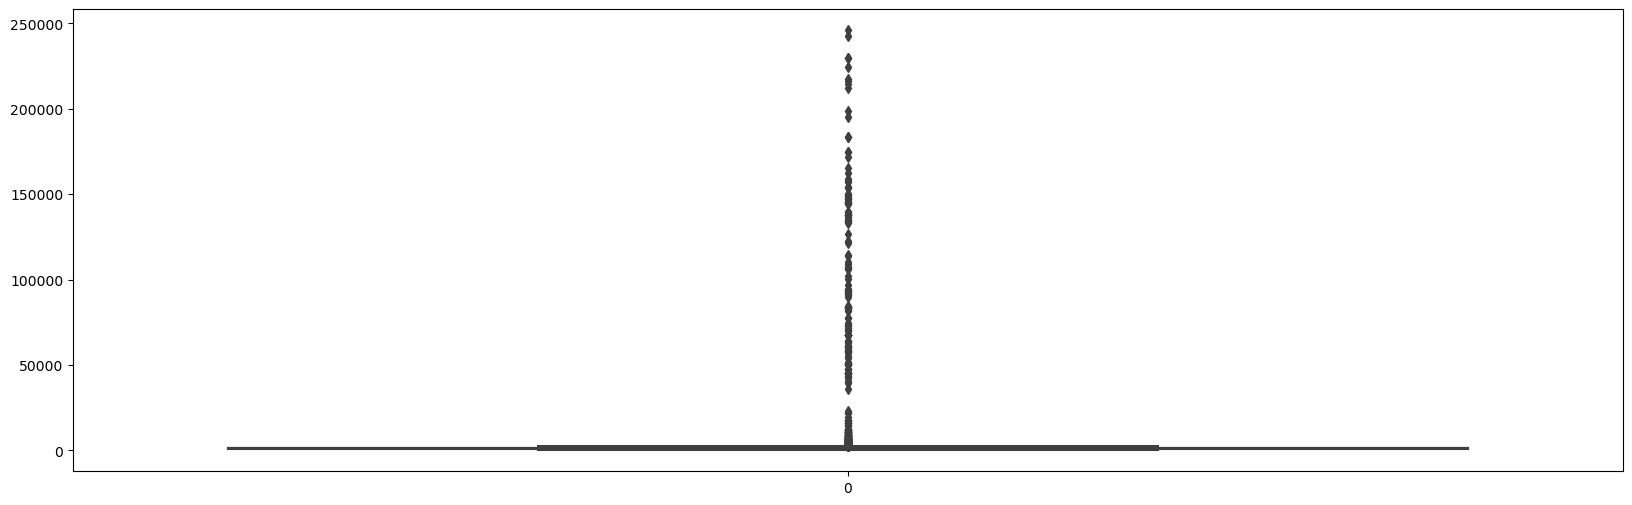

In [45]:
plt.figure(figsize=(20,6))
sns.boxplot(df4["SQUARE_FT"])

In [46]:
df4.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
## Let's see How many building are ready to move

In [ ]:
df4["READY_TO_MOVE"].value_counts()

In [ ]:
df4.groupby("READY_TO_MOVE")["TARGET(PRICE_IN_LACS)"].mean()
## There is no much more difference in

In [ ]:
df4["RESALE"].value_counts()

In [ ]:
## As you can see most of the houses are resold
df4.groupby("RESALE")["TARGET(PRICE_IN_LACS)"].mean()

In [ ]:
## It is clearly seen that resold houses are relatively lower price

In [ ]:
## Let's see the address columns

In [ ]:
df4["ADDRESS"].value_counts()

In [ ]:
## As we can see in the address , at the end of each address there is a prominent city or state name
##Let's extract these citis and states from these columns

In [ ]:
df4["ADDRESS"].apply(lambda x : x.split(",")[-1].strip())

In [50]:
## Let's store these values in a new column
df4["LOCATION"]=df4["ADDRESS"].apply(lambda x : x.split(",")[-1].strip())

In [51]:
df4["LOCATION"].value_counts()

Bangalore         4326
Lalitpur          2966
Mumbai            2022
Pune              1989
Noida             1767
Kolkata           1707
Maharashtra       1578
Chennai           1253
Ghaziabad         1087
Jaipur             960
Chandigarh         696
Faridabad          648
Mohali             556
Vadodara           509
Gurgaon            430
Surat              423
Nagpur             336
Lucknow            326
Indore             306
Bhubaneswar        234
Bhopal             218
Kochi              204
Visakhapatnam      178
Bhiwadi            161
Goa                149
Coimbatore         147
Dehradun           131
Ranchi             124
Mangalore          121
Gandhinagar        118
Sonipat            117
Secunderabad       108
Palghar            107
Kanpur              92
Guwahati            89
Raipur              89
Jamshedpur          86
Agra                83
Rajkot              83
Siliguri            83
Panchkula           82
Patna               82
Vijayawada          79
Aurangabad 

In [ ]:
## Let's make the value of the loaction "Others" if that value is less frequent i.e less than 20

In [52]:
rare_values=list(df4["LOCATION"].value_counts()[df4["LOCATION"].value_counts()<15].index)

In [53]:
rare_values

['Karad',
 'Nainital',
 'Chandrapur',
 'Kakinada',
 'Kannur',
 'Durg',
 'Amritsar',
 'Alwar',
 'Puri',
 'Kanchipuram',
 'Wardha',
 'Karnal',
 'Latur',
 'Hazaribagh',
 'Akola',
 'Gandhidham',
 'Bareilly',
 'Tirunelveli',
 'Moradabad',
 'Bardhaman',
 'Cuttack',
 'Rohtak',
 'Tenali',
 'Berhampur',
 'Rewari',
 'Ongole',
 'Jhansi',
 'Eluru',
 'Kollam',
 'Morbi',
 'Palwal',
 'Haldwani',
 'Muzaffarpur',
 'Dharwad',
 'Raigarh',
 'Nadiad',
 'Anantapur',
 'Gaya',
 'Ujjain',
 'Shirdi',
 'Bhimavaram',
 'Bokaro',
 'Gulbarga',
 'Kharagpur',
 'Jammu',
 'Bhagalpur',
 'Warangal',
 'Godhra',
 'Nanded',
 'Thanjavur',
 'Hosur',
 'Dhule',
 'Ambala',
 'Panipat',
 'Erode',
 'Salem',
 'Porbandar',
 'Srikakulam',
 'Roorkee',
 'Satna',
 'Gadhinglaj',
 'Hoshangabad',
 'Thoothukudi',
 'Rishikesh',
 'Hapur',
 'Jalna',
 'Bhandara',
 'Sikar',
 'Dalhousie',
 'Pathanamthitta',
 'Gurdaspur',
 'Kotdwara',
 'Yavatmal',
 'Hoshiarpur',
 'Beed',
 'Patiala',
 'Bikaner',
 'Rewa',
 'Haldia',
 'Ooty',
 'Jind',
 'Kadapa',
 'Badd

In [42]:
df4["LOCATION"].replace(rare_values,"Others",inplace=True)

NameError: name 'df4' is not defined

In [54]:
df4["LOCATION"].value_counts()

Bangalore         4326
Lalitpur          2966
Mumbai            2022
Pune              1989
Noida             1767
Kolkata           1707
Maharashtra       1578
Chennai           1253
Ghaziabad         1087
Jaipur             960
Chandigarh         696
Faridabad          648
Mohali             556
Vadodara           509
Gurgaon            430
Surat              423
Nagpur             336
Lucknow            326
Indore             306
Bhubaneswar        234
Bhopal             218
Kochi              204
Visakhapatnam      178
Bhiwadi            161
Goa                149
Coimbatore         147
Dehradun           131
Ranchi             124
Mangalore          121
Gandhinagar        118
Sonipat            117
Secunderabad       108
Palghar            107
Kanpur              92
Guwahati            89
Raipur              89
Jamshedpur          86
Agra                83
Rajkot              83
Siliguri            83
Panchkula           82
Patna               82
Vijayawada          79
Aurangabad 

In [ ]:
## Let's drop ADDRESS column
## As Latitude and Longitude are Specific to that address let's drop this also


In [55]:
df5=df4.drop(columns=["ADDRESS","LATITUDE","LONGITUDE"])

In [56]:
locations_values=list(df5["LOCATION"].unique())

In [57]:
locations_values

['Bangalore',
 'Mysore',
 'Ghaziabad',
 'Kolkata',
 'Kochi',
 'Jaipur',
 'Mohali',
 'Chennai',
 'Siliguri',
 'Noida',
 'Raigad',
 'Bhubaneswar',
 'Wardha',
 'Pune',
 'Mumbai',
 'Nagpur',
 'Deoghar',
 'Bhiwadi',
 'Faridabad',
 'Lalitpur',
 'Maharashtra',
 'Vadodara',
 'Visakhapatnam',
 'Vapi',
 'Mangalore',
 'Aurangabad',
 'Ottapalam',
 'Vijayawada',
 'Belgaum',
 'Bhopal',
 'Lucknow',
 'Kanpur',
 'Gandhinagar',
 'Pondicherry',
 'Agra',
 'Ranchi',
 'Gurgaon',
 'Udupi',
 'Indore',
 'Jodhpur',
 'Coimbatore',
 'Valsad',
 'Palghar',
 'Surat',
 'Varanasi',
 'Guwahati',
 'Amravati',
 'Anand',
 'Tirupati',
 'Secunderabad',
 'Raipur',
 'Vizianagaram',
 'Thrissur',
 'Satna',
 'Madurai',
 'Chandigarh',
 'Shimla',
 'Gwalior',
 'Rajkot',
 'Sonipat',
 'Allahabad',
 'Berhampur',
 'Roorkee',
 'Dharuhera',
 'Latur',
 'Durgapur',
 'Panchkula',
 'Solapur',
 'Durg',
 'Goa',
 'Jamshedpur',
 'Hazaribagh',
 'Jabalpur',
 'Hosur',
 'Morbi',
 'Hubli',
 'Karnal',
 'Patna',
 'Bilaspur',
 'Ratnagiri',
 'Meerut',
 '

In [58]:
cat_col=[col for col in df5.columns if df5[col].dtypes =="O"]

In [59]:
cat_col

['POSTED_BY', 'LOCATION']

In [ ]:
## Let's use label encoding to fill the value of categorical columns

In [60]:
df5["POSTED_BY"].unique()

array(['Owner', 'Dealer', 'Builder'], dtype=object)

In [61]:
posted_map={"Owner":0,"Dealer":1,"Builder":2}

In [62]:
all_loc=list(df5.groupby("LOCATION")["TARGET(PRICE_IN_LACS)"].mean().sort_values().index)

In [63]:
location_map={loc:i for i,loc in enumerate(all_loc)}

In [64]:
location_map

{'Bankura': 0,
 'Pali': 1,
 'Korba': 2,
 'Bhuj': 3,
 'Barabanki': 4,
 'Hajipur': 5,
 'Gurdaspur': 6,
 'Banswara': 7,
 'Harda': 8,
 'Sabarkantha': 9,
 'Hapur': 10,
 'Karad': 11,
 'Godhra': 12,
 'Gadarwara': 13,
 'Midnapore': 14,
 'Nadiad': 15,
 'Shirdi': 16,
 'Sikar': 17,
 'Anantapur': 18,
 'Bhandara': 19,
 'Karjat': 20,
 'Ujjain': 21,
 'Yavatmal': 22,
 'Bhavnagar': 23,
 'Panipat': 24,
 'Machilipatnam': 25,
 'Visnagar': 26,
 'Rudrapur': 27,
 'Palghar': 28,
 'Puri': 29,
 'Palanpur': 30,
 'Junagadh': 31,
 'Kharagpur': 32,
 'Durgapur': 33,
 'Ratnagiri': 34,
 'Jharsuguda': 35,
 'Bharuch': 36,
 'Malappuram': 37,
 'Wardha': 38,
 'Vapi': 39,
 'Kadi': 40,
 'Siddipet': 41,
 'Neemrana': 42,
 'Pudukkottai': 43,
 'Osmanabad': 44,
 'Gondia': 45,
 'Betul': 46,
 'Rayagada': 47,
 'Bhiwadi': 48,
 'Baddi': 49,
 'Chandrapur': 50,
 'Gandhidham': 51,
 'Washim': 52,
 'Dhule': 53,
 'Jalna': 54,
 'Valsad': 55,
 'Bhilai': 56,
 'Navsari': 57,
 'Nanded': 58,
 'Hosur': 59,
 'Asansol': 60,
 'Alwar': 61,
 'Thanjavur

In [65]:
df5["LOCATION"]=df5["LOCATION"].map(location_map)

In [66]:
df5["POSTED_BY"]=df5["POSTED_BY"].map(posted_map)

In [67]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29377 entries, 0 to 29450
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29377 non-null  int64  
 1   UNDER_CONSTRUCTION     29377 non-null  int64  
 2   RERA                   29377 non-null  int64  
 3   BHK_NO.                29377 non-null  int64  
 4   SQUARE_FT              29377 non-null  float64
 5   READY_TO_MOVE          29377 non-null  int64  
 6   RESALE                 29377 non-null  int64  
 7   TARGET(PRICE_IN_LACS)  29377 non-null  float64
 8   LOCATION               29377 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.2 MB


## Let's see correlation plot

In [ ]:
##Let's plot correlation between output and input features

<Axes: >

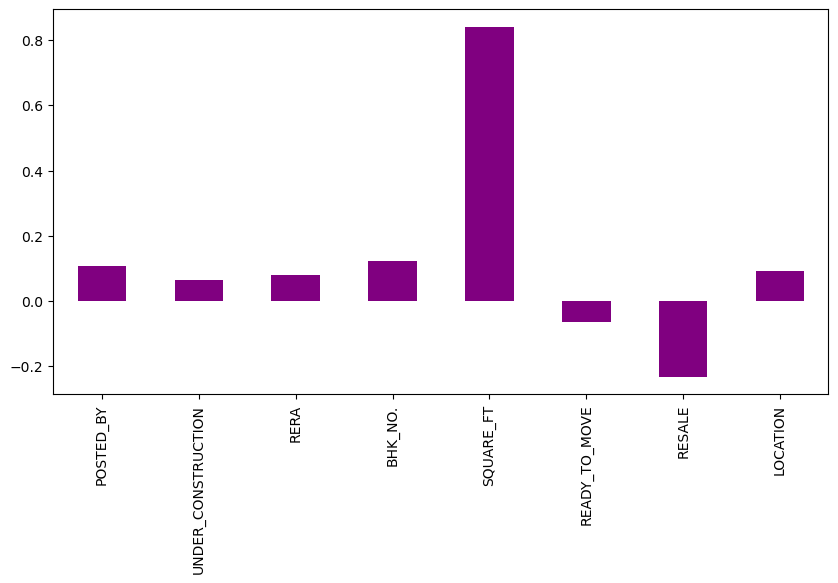

In [68]:
plt.figure(figsize=(10,5))
df5.drop(columns=["TARGET(PRICE_IN_LACS)"]).corrwith(df["TARGET(PRICE_IN_LACS)"]).plot(kind="bar",color="purple")

In [ ]:
## As you can see the square foot column is more correlated

In [ ]:
## Let's see correlation betweem input features

<Axes: >

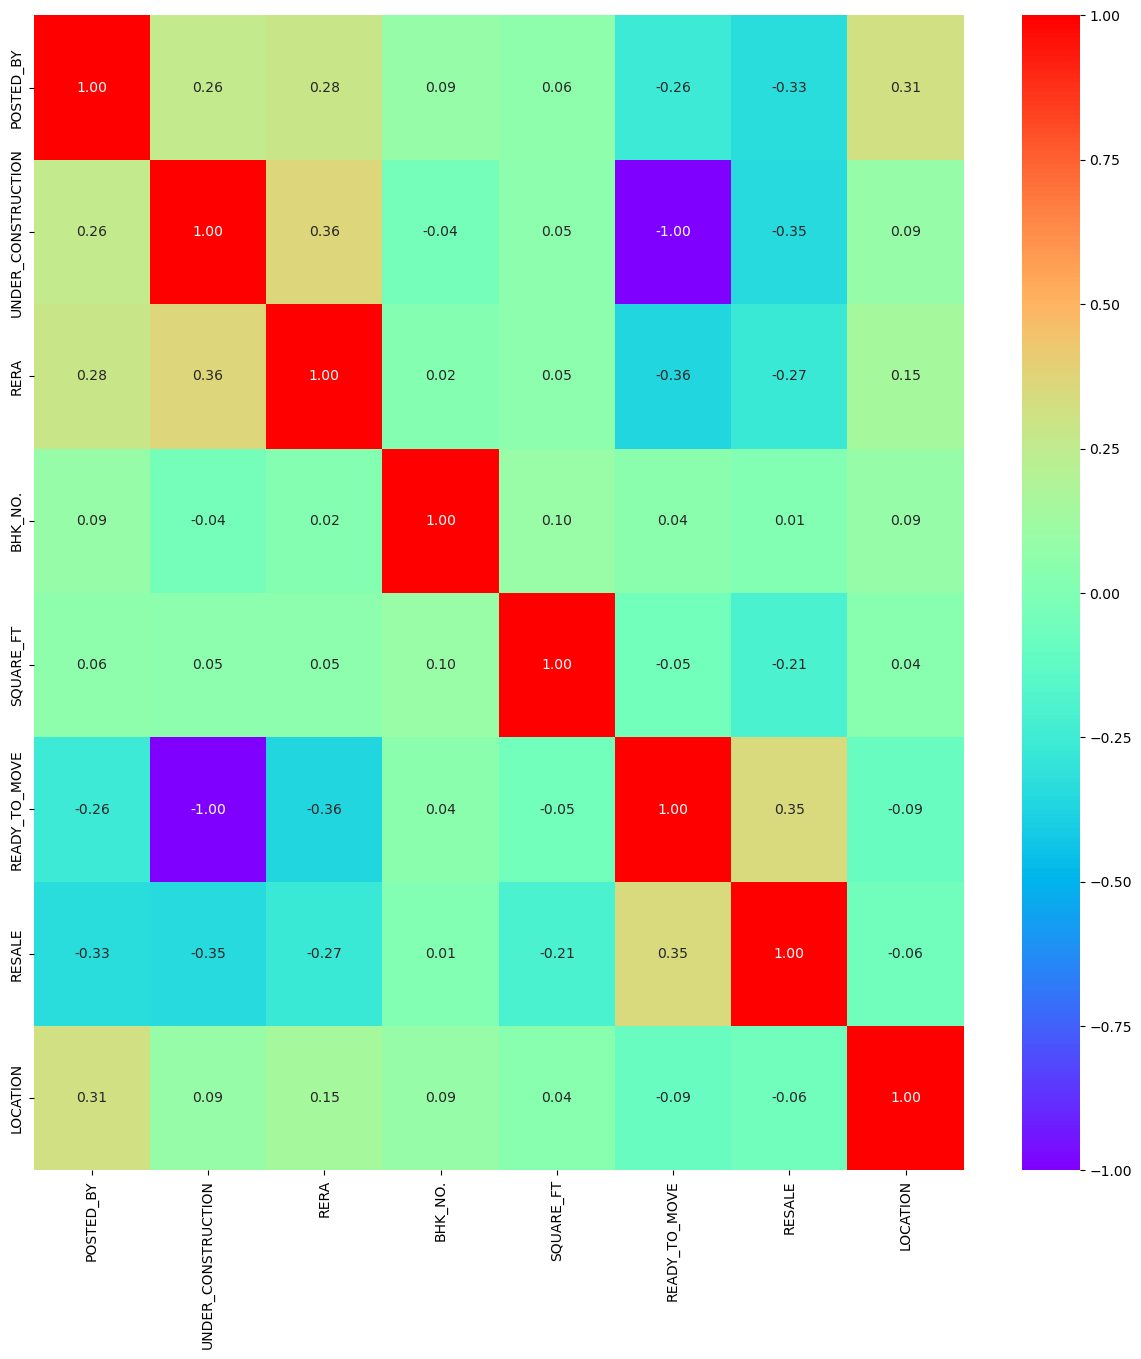

In [69]:
plt.figure(figsize=(15,15))
sns.heatmap(df5.drop(columns=["TARGET(PRICE_IN_LACS)"]).corr(),cmap="rainbow",fmt=".2f",annot=True)

In [ ]:
## As I can see there is high correlation betwwen under construction and ready to move. The realtion is clear that as the house is under cnstruction it is not ready to use hence drop it

In [70]:
df5.drop(columns=["UNDER_CONSTRUCTION"],inplace=True)

### Model Building

In [71]:
X=df5.drop(columns=["TARGET(PRICE_IN_LACS)"])
y=df5["TARGET(PRICE_IN_LACS)"]

In [72]:
X.head()

,POSTED_BY,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LOCATION
0,0,0,2,1300.236407,1,1,245
1,1,0,2,1275.000000,1,1,213
2,0,0,2,933.159722,1,1,245
3,0,1,2,929.921143,1,1,196
4,1,0,2,999.009247,0,1,232


In [73]:
X.shape

(29377, 7)

In [77]:
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score,mean_squared_error

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.15,random_state=100)

In [ ]:
sc=StandardScaler()
train_X=sc.fit_transform(train_X)

In [ ]:
test_X=sc.transform(test_X)

In [ ]:
def check_test_score(model):
    pred=model.predict(test_X)
    print("R2 score is:", r2_score(test_y,pred))
    print("The mean squared error is :",mean_squared_error(test_y,pred))
    

In [ ]:
lr=LinearRegression()
lr.fit(train_X,train_y)

In [ ]:
check_test_score(lr)

In [ ]:
lasso=Lasso(random_state=100)
lasso.fit(train_X,train_y)

In [ ]:
check_test_score(lasso)

In [ ]:
ridge=Ridge(random_state=100)
ridge.fit(train_X,train_y)

In [ ]:
check_test_score(ridge)

In [ ]:
sv_regressor=SVR(kernel="linear")
sv_regressor.fit(train_X,train_y)

In [ ]:
check_test_score(sv_regressor)

In [ ]:
sv_regressor=SVR(kernel="rbf")
sv_regressor.fit(train_X,train_y)

In [ ]:
check_test_score(sv_regressor)

In [ ]:
dt=DecisionTreeRegressor()
dt.fit(train_X,train_y)

In [ ]:
check_test_score(dt)

In [ ]:
rf=RandomForestRegressor()

In [ ]:
rf.fit(train_X,train_y)

In [ ]:
check_test_score(rf)

In [ ]:
gradient_bosting=GradientBoostingRegressor()
gradient_bosting.fit(train_X,train_y)

In [ ]:
check_test_score(gradient_bosting)

In [ ]:
cat_boost=CatBoostRegressor()
cat_boost.fit(train_X,train_y)

In [ ]:
check_test_score(cat_boost)

In [ ]:
xg_boost=XGBRegressor()
xg_boost.fit(train_X,train_y)

In [ ]:
check_test_score(xg_boost)

In [ ]:
light_gbm=LGBMRegressor()
light_gbm.fit(train_X,train_y)

In [ ]:
check_test_score(light_gbm)

In [ ]:
## Among all models Gradient Boosting Techniques Outperforms all these values

In [ ]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [ ]:
cross_val_score(GradientBoostingRegressor(),X,y,cv=10,scoring="r2",verbose=2,n_jobs=-1)

In [ ]:
model=GradientBoostingRegressor()

In [ ]:
model.fit(X,y)

In [ ]:
model.score(test_X,test_y)

In [ ]:
## As you can see it is performimg well
import pickle

In [ ]:
with open("my_model.pkl","wb") as f:
    pickle.dump(model,f)

In [ ]:
with open("my_scalar.pkl","wb") as f:
    pickle.dump(sc,f)

In [ ]:
df5

In [ ]:
posted_map

In [ ]:
yes_map={"Yes":1,"No":0}

In [ ]:
Pause=True
while Pause:
    values=[]
    a=input("POSTED_BY")
    values.append(posted_map[a])
    a=input("RERA approved or not")
    values.append(yes_map[a])
    a=int(input("Number of Rooms"))
    values.append(a)
    a=int(input("Square foot"))
    values.append(a)
    a=input("Ready to Move")
    values.append(yes_map[a])
    a=input("Resale")
    values.append(yes_map[a])
    a=input("Location")
    values.append(location_map[a])
    Pause=False
    

In [ ]:
val=sc.transform([values])

In [ ]:
model.predict(val)

In [ ]:
for loc in locations_values:
    print(f"""<option value="{loc}">{loc}</option>""")

In [ ]:
len(locations_values)

In [ ]:
posted_map={'Owner': 0, 'Dealer': 1, 'Builder': 2}

In [ ]:
posted_map

In [ ]:
location_map